In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [29]:
df = pd.read_csv('lin_reg.csv')

In [30]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


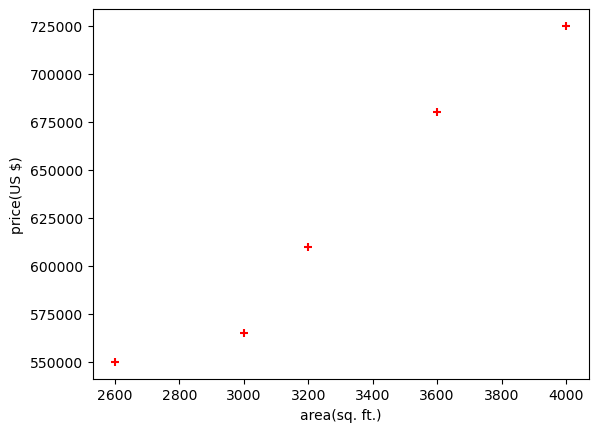

In [31]:
%matplotlib inline
plt.xlabel('area(sq. ft.)')
plt.ylabel('price(US $)')
plt.scatter(df.area,df.price, color='red', marker='+')

In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [6]:
reg.predict([[3300]])

/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [7]:
reg.coef_

array([135.78767123])

In [8]:
reg.intercept_

180616.43835616432

In [9]:
reg.predict([[5000]])

/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [10]:
df = pd.read_csv('areas.csv')

In [11]:
df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [ ]:
df['price'] = reg.predict(df)

In [ ]:
df

In [ ]:
df.to_csv('prediction.csv', index=False)

In [ ]:
%matplotlib inline
plt.xlabel('area(sq. ft.)')
plt.ylabel('price(US $)')
plt.scatter(df.area,df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color = 'blue')

In [ ]:
df = pd.read_csv('multi.csv')

In [ ]:
df

In [ ]:
median_bedrooms = df.bedrooms.median()

In [ ]:
median_bedrooms

In [ ]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)

In [ ]:
df

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
reg.predict([[3000, 3, 40]])

In [ ]:
reg.predict([[2500, 4, 5]])

In [ ]:
def gradient_descent(x,y):
    m_curr = 0
    b_curr = 0
    lr = 0.001
    iteration = 150
    n = len(x)
    
    for i in range(iteration):
        y_pred = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y - y_pred)])
        m_derivative = -(2/n)*sum(x*(y - y_pred))
        b_derivative = -(2/n)*sum(y - (y - y_pred))
        m_curr = m_curr - (lr*m_derivative)
        b_curr = b_curr - (lr*b_derivative)
        print("m {}, b {}, cost {}, iteration {}".format(m_curr, b_curr, cost, i))
        
        
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
gradient_descent(x,y)

For the first problem

In [ ]:
import pickle

In [ ]:
with open('model_pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [ ]:
mp.predict([[5000]])

For the saving and loading of the model, joblib is used and it is highly preferred when dealing with numerous numpy datasets.

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'model_joblib')

In [ ]:
mj = joblib.load('model_joblib')

In [ ]:
mj.predict([[5000]])

In [ ]:
mj.predict([[6000]])

Classification of the categorical variables:

# Nominal
These categorical variables when represented in the integer format do not bear any sort of relation between them. 
e.g. 
male,female
blue, green, black, yellow
township names

# Ordinal
These categorical variables when represented in the integer format bear a specific relation between them. 
e.g. 
graduate degree phd, masters, bachelors
high, medium, low
strength level strong, medium, weak

# One Hot Encoding
assigns 1 to the column which is represented rest every variable is zero.

In [62]:
df = pd.read_csv('category.csv')

In [63]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [5]:
dummies = pd.get_dummies(df.town)

In [6]:
merged = pd.concat([df, dummies], axis = 'columns')

In [7]:
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [8]:
final = merged.drop(['town', 'west windsor'], axis = 'columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [75]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [10]:
X = final.drop('price', axis = 'columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [11]:
y = final.price

In [12]:
linear.fit(X,y)

LinearRegression()

In [13]:
linear.predict([[2800,0,1]])

/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [14]:
linear.predict([[3400,0,0]])

/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [15]:
linear.score(X,y)

0.9573929037221873

In [16]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [65]:
dfle = df
dfle.town = le.fit_transform(dfle.town)

In [66]:
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [67]:
X = dfle[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [68]:
y = dfle.price

In [69]:
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')

In [71]:
X = np.array(columnTransformer.fit_transform(X))

In [72]:
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [73]:
X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [76]:
linear.fit(X,y)

LinearRegression()

In [78]:
linear.predict([[1,0,2800]])

array([590775.63964739])

In [91]:
car = pd.read_csv('car.csv')

In [92]:
car

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


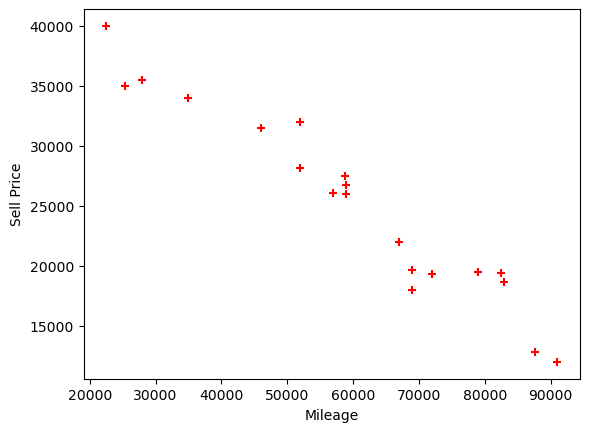

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Mileage')
plt.ylabel('Sell Price')
plt.scatter(car['Mileage'], car['Sell Price($)'], color = 'red', marker = '+')

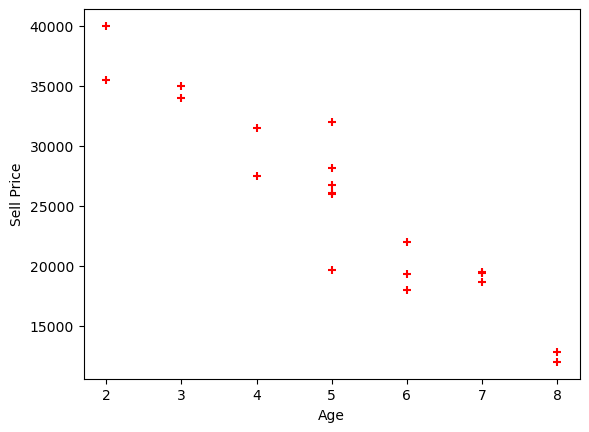

In [94]:
plt.xlabel('Age')
plt.ylabel('Sell Price')
plt.scatter(car['Age(yrs)'], car['Sell Price($)'], color = 'red', marker = '+')

In [95]:
X = car.drop('Sell Price($)', axis = 'columns')

In [96]:
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [97]:
y = car['Sell Price($)']

In [98]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [108]:
len(X_train)

16

In [109]:
len(X_test)

4

In [110]:
X_train

,Mileage,Age(yrs)
18,87600,8
4,46000,4
12,59000,5
2,57000,5
13,58780,4
1,35000,3
16,28000,2
0,69000,6
14,82450,7
19,52000,5


In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [113]:
lin.predict(X_test)

array([20563.11928554, 17680.31036532, 27713.63626014, 37615.64806099])

In [114]:
y_test

7     19300
11    19500
6     32000
15    35000
Name: Sell Price($), dtype: int64

In [115]:
lin.score(X_test, y_test)

0.8518601800748954

In [135]:
import pandas as pd
ins = pd.read_csv('insurance.csv')
ins

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


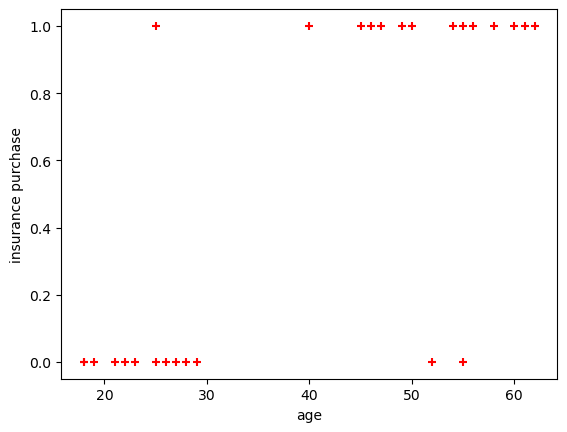

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('age')
plt.ylabel('insurance purchase')
plt.scatter(ins['age'], ins['bought_insurance'], color = 'red', marker = '+')

In [137]:
ins.shape

(27, 2)

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(ins[['age']], ins['bought_insurance'], test_size = 0.1)

In [140]:
X_test

,age
12,27
7,60
0,22


In [141]:
X_train

,age
17,58
19,18
26,23
3,52
21,26
23,45
25,54
1,25
10,18
6,55


In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [145]:
log.predict(X_test)

array([0, 1, 0])

In [147]:
log.score(X_test,y_test)

1.0

In [148]:
log.predict_proba(X_test)

array([[0.80297828, 0.19702172],
       [0.06089503, 0.93910497],
       [0.88415774, 0.11584226]])

In [151]:
log.predict([[17]])

/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [170]:
from sklearn.datasets import load_digits

In [171]:
digits = load_digits()

In [181]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [173]:
digits.data.shape

(1797, 64)

In [175]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

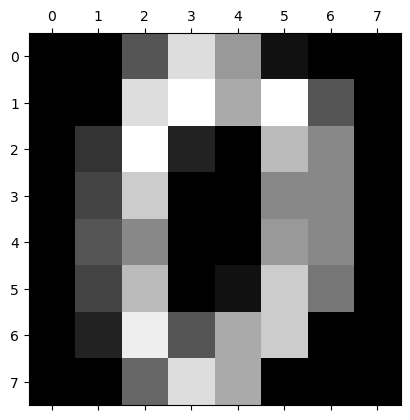

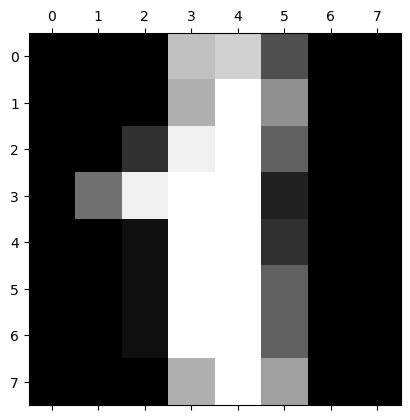

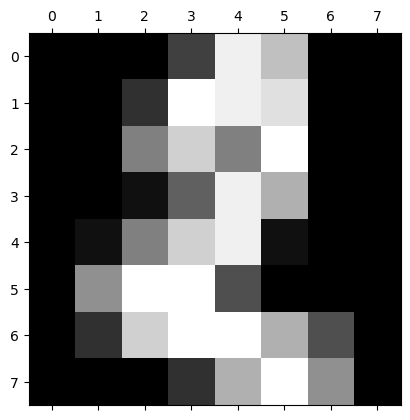

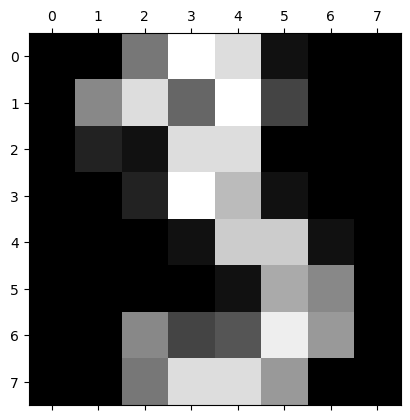

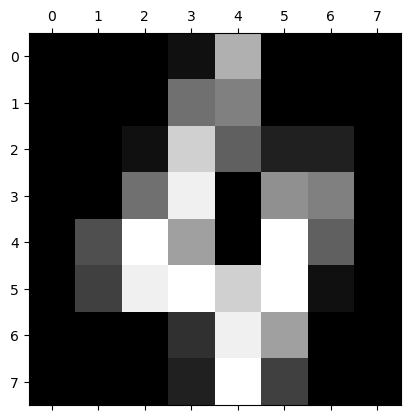

In [174]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [179]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [184]:
len(X_train)

1437

In [185]:
len(X_test)

360

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
log = LogisticRegression()
log.fit(X_train, y_train)

/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [188]:
log.predict(X_test)

array([8, 1, 9, 5, 4, 8, 4, 6, 2, 2, 1, 9, 3, 1, 2, 0, 6, 9, 4, 7, 0, 5,
       1, 9, 6, 2, 1, 2, 9, 0, 3, 8, 3, 5, 5, 7, 9, 7, 7, 0, 7, 1, 1, 3,
       4, 0, 4, 6, 7, 9, 6, 2, 4, 9, 1, 1, 1, 6, 1, 8, 3, 0, 0, 2, 4, 1,
       2, 1, 7, 9, 0, 1, 2, 6, 8, 5, 4, 7, 2, 2, 7, 4, 3, 6, 8, 6, 1, 0,
       8, 0, 6, 8, 0, 4, 6, 1, 1, 7, 0, 8, 7, 1, 7, 8, 4, 0, 8, 2, 1, 2,
       4, 2, 7, 6, 1, 9, 5, 9, 7, 7, 2, 8, 0, 5, 9, 0, 4, 4, 8, 1, 5, 9,
       3, 5, 3, 9, 0, 7, 8, 2, 1, 1, 9, 2, 1, 4, 2, 5, 6, 2, 5, 5, 0, 5,
       0, 2, 6, 2, 0, 6, 7, 4, 6, 6, 1, 4, 7, 3, 8, 9, 9, 3, 8, 7, 4, 8,
       9, 3, 5, 3, 2, 3, 9, 2, 3, 4, 8, 8, 7, 2, 9, 7, 2, 7, 7, 2, 9, 1,
       6, 4, 7, 0, 7, 4, 1, 7, 0, 0, 7, 1, 5, 0, 5, 6, 6, 3, 3, 3, 1, 0,
       2, 4, 2, 5, 2, 9, 6, 9, 3, 4, 7, 9, 5, 9, 5, 8, 2, 0, 6, 5, 1, 6,
       6, 2, 9, 9, 9, 5, 0, 5, 7, 8, 5, 5, 5, 1, 2, 1, 0, 4, 0, 4, 6, 3,
       6, 6, 0, 6, 4, 8, 6, 1, 4, 1, 3, 5, 6, 6, 4, 6, 5, 9, 5, 6, 8, 2,
       9, 6, 9, 9, 1, 3, 3, 8, 9, 1, 9, 7, 6, 7, 1,

In [189]:
log.score(X_test, y_test)

0.975

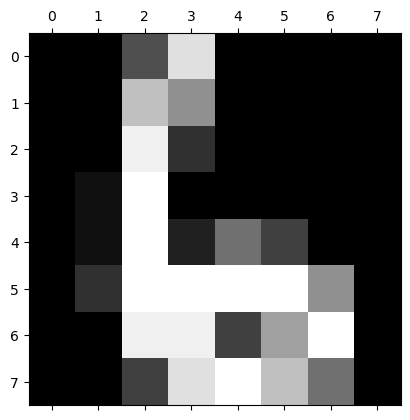

In [190]:
plt.matshow(digits.images[67])

In [191]:
digits.target[67]

6

In [196]:
log.predict(digits.data[0:9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

We want to check where my model is not performing well. For that purpose we are taking confusion matrix into account

In [197]:
from sklearn.metrics import confusion_matrix
y_pred = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[34,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0, 37]])

In [199]:
pip install seaborn

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
Note: you may need to restart the kernel to use updated packages.


Text(95.72222222222221, 0.5, 'True')

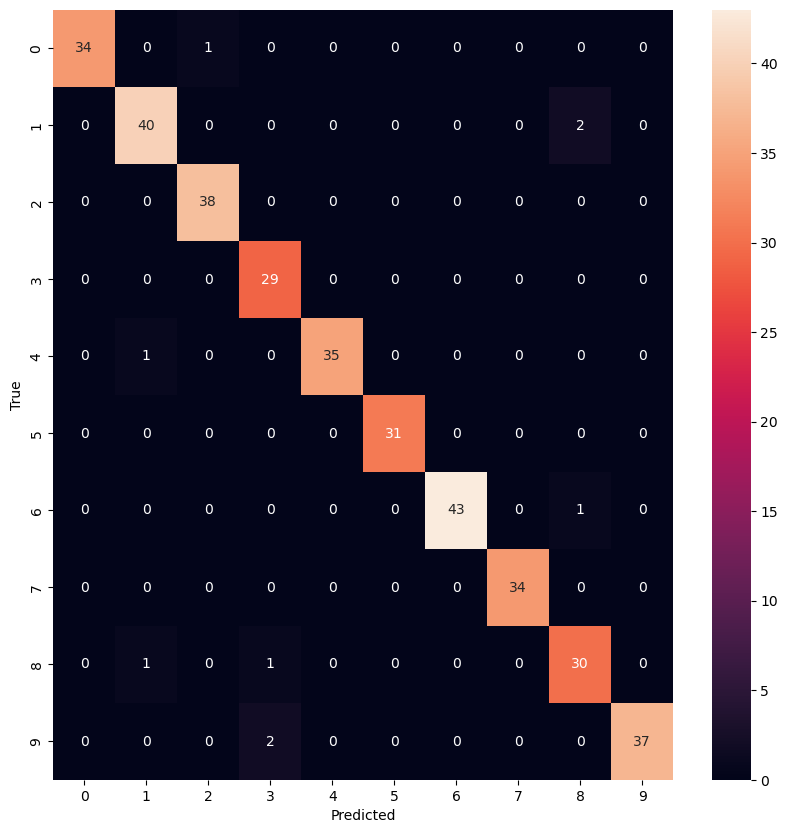

In [201]:
import seaborn as sns
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [202]:
salary = pd.read_csv('salary.csv')

In [203]:
salary

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [205]:
inputs = salary.drop('salary_more_then_100k', axis = 'columns')
target = salary['salary_more_then_100k']

In [206]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [207]:
from sklearn.preprocessing import LabelEncoder

In [208]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [209]:
inputs['company_en'] = le_company.fit_transform(inputs['company'])
inputs['job_en'] = le_job.fit_transform(inputs['job'])
inputs['degree_en'] = le_degree.fit_transform(inputs['degree'])
inputs

,company,job,degree,company_en,job_en,degree_en
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [210]:
inputs.drop(['company', 'job', 'degree'], axis = 'columns', inplace = True)

In [211]:
inputs

,company_en,job_en,degree_en
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [212]:
from sklearn import tree

In [214]:
model = tree.DecisionTreeClassifier()

In [215]:
model.fit(inputs, target)

DecisionTreeClassifier()

In [216]:
model.score(inputs, target)

1.0

In [217]:
model.predict([[2,0,1]])

/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [218]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [219]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [220]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [222]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [223]:
df['Target'] = iris.target

In [224]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [225]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [229]:
df[df.Target==2].count()

sepal length (cm)    50
sepal width (cm)     50
petal length (cm)    50
petal width (cm)     50
Target               50
dtype: int64

In [231]:
df['flower_name'] = df.Target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [233]:
import matplotlib.pyplot as plt
%matplotlib inline
df0 = df[df.Target == 0]
df1 = df[df.Target == 1]
df2 = df[df.Target == 2]

In [235]:
df0.shape

(50, 6)

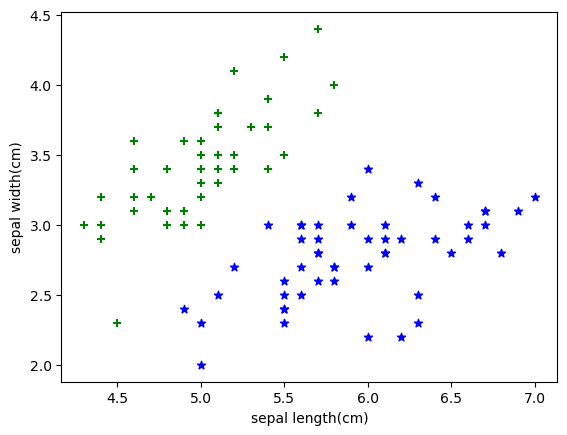

In [240]:
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker = '*')

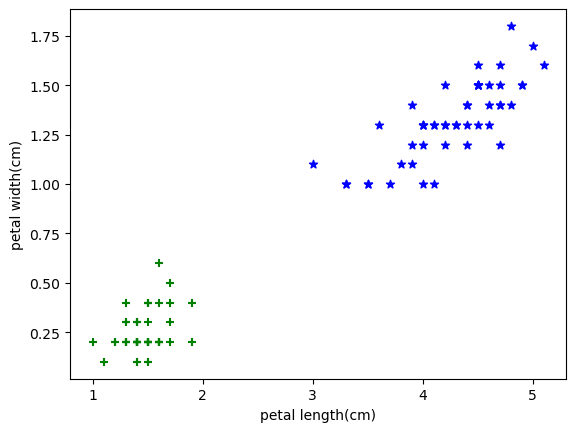

In [239]:
plt.xlabel('petal length(cm)')
plt.ylabel('petal width(cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker = '*')

In [241]:
from sklearn.model_selection import train_test_split
X = df.drop(['Target', 'flower_name'], axis = 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [242]:
y = df['Target']

In [243]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [246]:
X_train.shape

(120, 4)

In [247]:
X_test.shape

(30, 4)

In [251]:
from sklearn.svm import SVC
from sklearn import set_config
set_config(print_changed_only=False)
model = SVC()

In [252]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [253]:
model.score(X_test, y_test)

0.9333333333333333

In [254]:
model.predict(X_test)

array([0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2,
       1, 2, 1, 0, 1, 0, 2, 2])

In [255]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [256]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

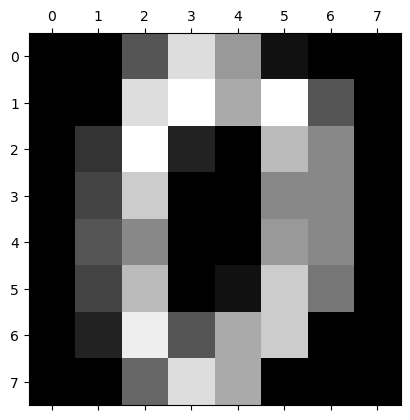

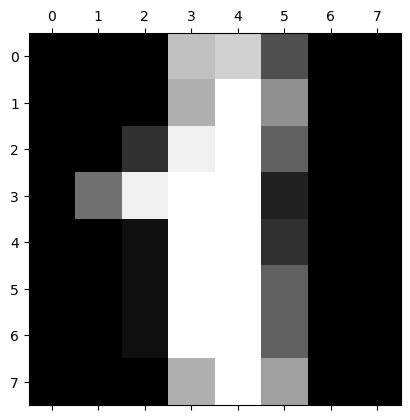

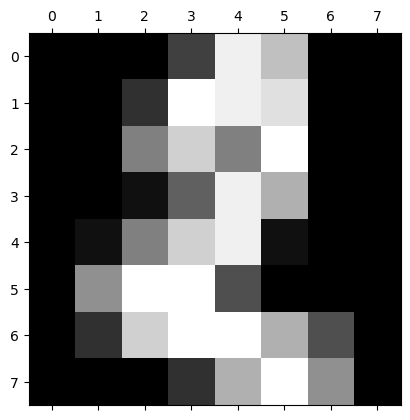

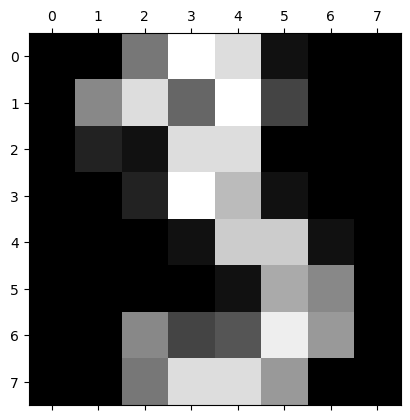

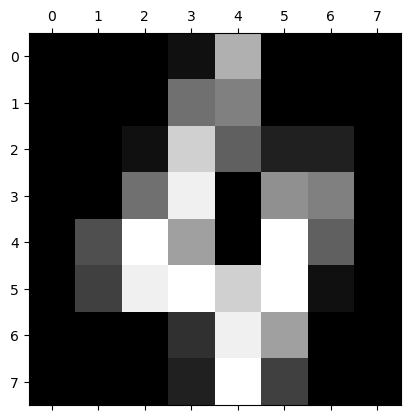

In [257]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [258]:
df = pd.DataFrame(digits.data)

In [259]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [260]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [261]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis = 'columns'),digits.target, test_size = 0.2)

In [263]:
len(X_train)

1437

In [264]:
len(X_test)

360

In [265]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [266]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [267]:
model.score(X_test, y_test)

0.9694444444444444

In [268]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 29,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 26,  0,  0],
       [ 0,  0,  1,  1,  0,  1,  0,  1, 46,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 30]])

<AxesSubplot: >

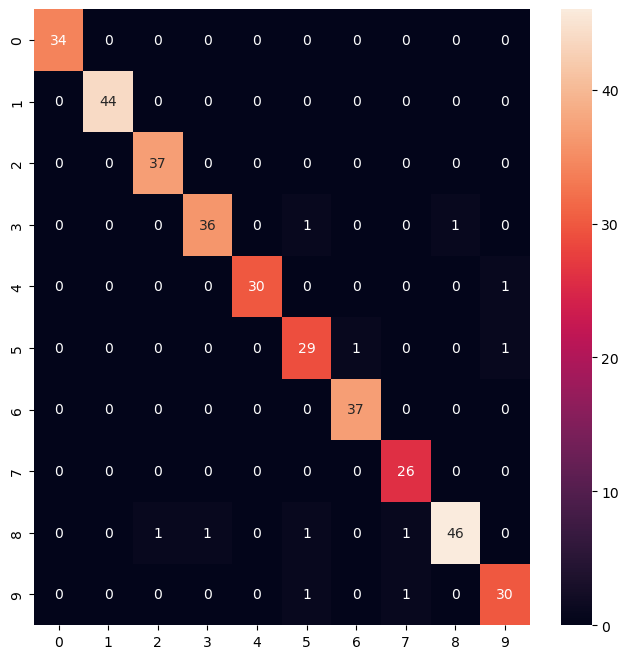

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,8))
plt.xlabel('Predicted')
plt.ylabel('Truth')
sns.heatmap(cm, annot=True)

# K-FOLD CROSS VALIDATION

In [284]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split

digits = load_digits()

In [285]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [286]:
len(X_train)

1437

In [287]:
log = LogisticRegression()
log.fit(X_train, y_train)

/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [288]:
log.score(X_test, y_test)

0.9611111111111111

In [289]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [290]:
rf.score(X_test, y_test)

0.9777777777777777

In [291]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [292]:
svm.score(X_test, y_test)

0.9916666666666667

In [293]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

Implementing KFold manually

In [303]:
for train_idx, test_idx in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_idx, test_idx)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [295]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [298]:
get_score(rf,X_train, X_test, y_train, y_test)

0.9777777777777777

In [299]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [304]:
scores_l = []
scores_svm = []
scores_rf = []

for train_index, test_index in kf.split(digits.data):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                        digits.target[train_index], digits.target[test_index]
    
    scores_l.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    

/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [305]:
scores_l

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [306]:
scores_rf

[0.9465776293823038, 0.9515859766277128, 0.9265442404006677]

In [307]:
scores_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [308]:
from sklearn.model_selection import cross_val_score

In [310]:
cross_val_score(LogisticRegression(), digits.data, digits.target)

/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [311]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [312]:
cross_val_score(RandomForestClassifier(), digits.data, digits.target)

array([0.93055556, 0.925     , 0.95543175, 0.96100279, 0.94428969])

In [313]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [314]:
df = pd.read_csv('income.csv')

In [316]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


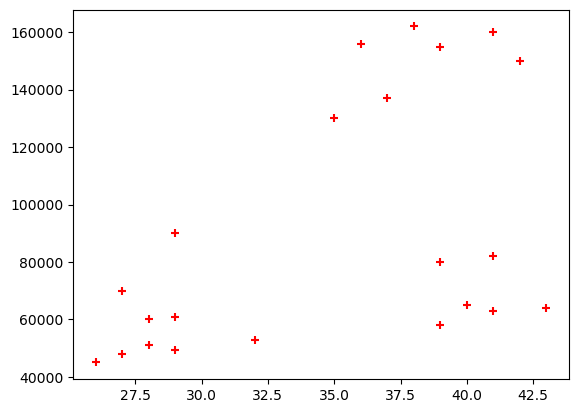

In [318]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Age'], df['Income($)'], color = 'red', marker = '+')

In [319]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0)

In [320]:
y_pred = km.fit_predict(df[['Age' , 'Income($)']])
y_pred

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2],
      dtype=int32)

0, 1 and 2 are the clusters

In [321]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


Text(0, 0.5, 'Income ($)')

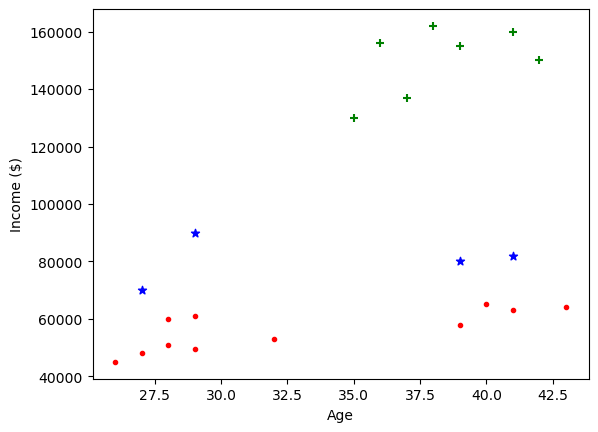

In [325]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green', marker = '+')
plt.scatter(df2.Age, df2['Income($)'], color = 'blue', marker = '*')
plt.scatter(df3.Age, df3['Income($)'], color = 'red', marker = '.')
plt.xlabel('Age')
plt.ylabel('Income ($)')

It has misclassified the data points.Reason being Range of income column is largely different from the age column. We have to use scaling to bring it down to one unit.

In [332]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [334]:
df.drop('cluster', axis = 'columns', inplace=True)

In [335]:
df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [336]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0)

In [337]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [338]:
df['cluster'] = y_pred

In [339]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [345]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income ($)')

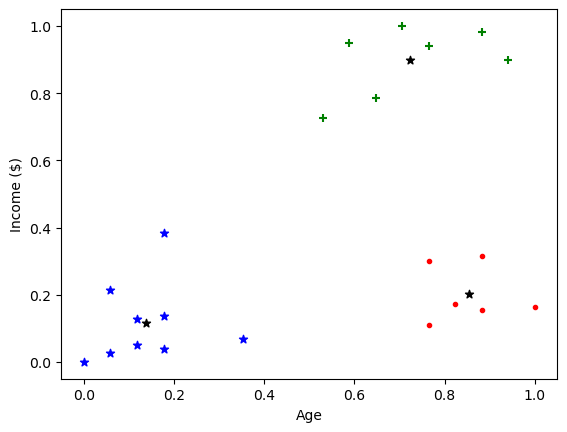

In [344]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green', marker = '+')
plt.scatter(df2.Age, df2['Income($)'], color = 'blue', marker = '*')
plt.scatter(df3.Age, df3['Income($)'], color = 'red', marker = '.')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker = '*')
plt.xlabel('Age')
plt.ylabel('Income ($)')

# Elbow Plot

In [346]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [347]:
sse

[5.434011511988177,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.2664030124668415,
 0.22443334487241418,
 0.16858512236029755,
 0.13717729016208896,
 0.10383752586603559,
 0.07996937425152906]

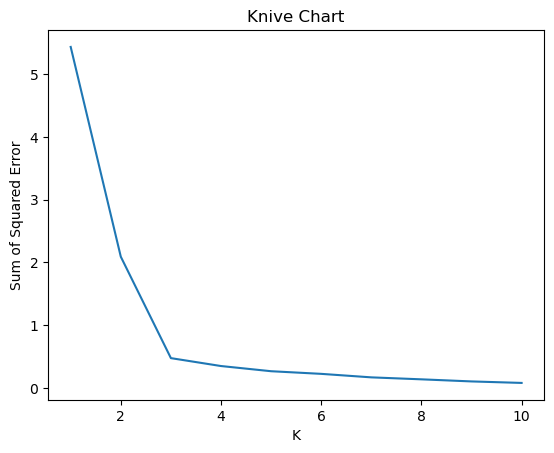

In [350]:
plt.title('Knive Chart')
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)

When the features are independent of each other, we use naive bayes.

In [352]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [353]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 'columns', inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [355]:
X = df.drop('Survived', axis = 'columns')
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [356]:
y = df['Survived']

In [357]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [358]:
dummies = pd.get_dummies(X.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [360]:
X = pd.concat([X, dummies], axis = 'columns')

In [361]:
X.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [362]:
X.drop(['Sex','female'], axis = 'columns', inplace=True)

In [363]:
X.head()

,Pclass,Age,Fare,male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [367]:
X.describe()

,Pclass,Age,Fare,male
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.647587
std,0.836071,14.526497,49.693429,0.477990
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,1.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [368]:
X['Age'] = X['Age'].fillna(X.Age.median())
X.head()

,Pclass,Age,Fare,male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [369]:
X.describe()

,Pclass,Age,Fare,male
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,32.204208,0.647587
std,0.836071,13.019697,49.693429,0.477990
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,22.000000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,1.000000
75%,3.000000,35.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [370]:
X.tail(10)

,Pclass,Age,Fare,male
881,3,33.0,7.8958,1
882,3,22.0,10.5167,0
883,2,28.0,10.5000,1
884,3,25.0,7.0500,1
885,3,39.0,29.1250,0
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1
890,3,32.0,7.7500,1


In [372]:
from sklearn.model_selection import train_test_split

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [374]:
len(X_train)

712

In [375]:
len(X_test)

179

In [377]:
from sklearn.naive_bayes import GaussianNB

In [378]:
model = GaussianNB()

In [379]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [380]:
model.score(X_test,y_test)

0.8100558659217877

In [381]:
X_test[:10]

,Pclass,Age,Fare,male
163,3,17.0,8.6625,1
484,1,25.0,91.0792,1
166,1,28.0,55.0000,0
840,3,20.0,7.9250,1
575,3,19.0,14.5000,1
141,3,22.0,7.7500,0
337,1,41.0,134.5000,0
548,3,33.0,20.5250,1
168,1,28.0,25.9250,1
878,3,28.0,7.8958,1


In [382]:
y_test[:10]

/var/folders/4f/9wwls0j92z90fgmqsv9knhsc0000gn/T/ipykernel_53555/2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


163    0
484    1
166    1
840    0
575    0
141    1
337    1
548    0
168    0
878    0
Name: Survived, dtype: int64

In [383]:
model.predict(X_test[:10])

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [384]:
model.predict_proba(X_test[:10])

array([[9.55968658e-01, 4.40313417e-02],
       [2.62157565e-01, 7.37842435e-01],
       [5.99943981e-02, 9.40005602e-01],
       [9.59768670e-01, 4.02313302e-02],
       [9.59429097e-01, 4.05709032e-02],
       [4.54334937e-01, 5.45665063e-01],
       [4.68303653e-04, 9.99531696e-01],
       [9.68531988e-01, 3.14680122e-02],
       [7.74156759e-01, 2.25843241e-01],
       [9.66310112e-01, 3.36898883e-02]])

In [385]:
spam = pd.read_csv('spam.csv')

In [386]:
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [387]:
spam.groupby('Category').count()

,Message
Category,
ham,4825
spam,747


In [388]:
spam.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [390]:
spam['spam'] = spam['Category'].apply(lambda x: 1 if x == 'spam' else 0)
spam.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [391]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spam.Message, spam.spam, test_size = 0.2)

In [392]:
len(X_train)

4457

In [393]:
len(X_test)

1115

CountVectorizer function counts the occurence of a word in the sentence and returns the count.

Example:

In [394]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third document.',
    'Is this the first document?'
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 1 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 1 0 1 1 1]
 [0 1 1 1 0 1 0 1]]


/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [408]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)

In [409]:
X_train_count.toarray().shape

(4457, 7676)

In [410]:
vectorizer.get_feature_names()

/Users/shubhamkumar/tensorflow-test/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '07946746291',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08006344447',
 '0808',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '

In [411]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [414]:
emails = [
    'hi guys! I have a great offer for you all!',
    'Enjoy 20% off on every product at weekends.',
    'Monday morning football at 5',
    'Free Entry'
]

emails_count = vectorizer.transform(emails)
model.predict(emails_count)

array([0, 0, 0, 1])

In [413]:
X_test_count = vectorizer.transform(X_test)
model.score(X_test_count, y_test)

0.9847533632286996

In [415]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [416]:
clf

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [417]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [418]:
clf.score(X_test, y_test)

0.9847533632286996

In [419]:
clf.predict(emails)

array([0, 0, 0, 1])

In [420]:
from sklearn.datasets import load_iris
iris = load_iris()

In [421]:
import pandas as pd
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [438]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [442]:
from sklearn.svm import SVC
model = svm.SVC(kernel='rbf', C=30, gamma = 'auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

HyperParameter Manual Using Cross-Validation

In [443]:
from sklearn.model_selection import cross_val_score

In [444]:
cross_val_score(svm.SVC(kernel = 'linear', C=10, gamma = 'auto'), iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [445]:
cross_val_score(svm.SVC(kernel = 'rbf', C=10, gamma = 'auto'), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [446]:
cross_val_score(svm.SVC(kernel = 'rbf', C=20, gamma = 'auto'), iris.data, iris.target, cv = 5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

We use for loop to perform the iterations

In [448]:
import numpy as np
kernels = ['rbf', 'linear']
C = [1,10,20,30]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel = kval, C = cval, gamma = 'auto'), iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)
        
avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'rbf_30': 0.96,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666,
 'linear_30': 0.96}

This is fine if the number of parameter is less but as the number of hyperparameter increase it becomes computationally very expensive to use the for loop.

In [451]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C' : [1,5,10,20,30],
    'kernel' : ['linear', 'rbf']
}, cv = 5, return_train_score = False)

clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00089054, 0.00077534, 0.00028791, 0.00034871, 0.00027261,
        0.0003046 , 0.0002512 , 0.00032716, 0.00025711, 0.00028448]),
 'std_fit_time': array([2.84236682e-04, 1.57140381e-04, 1.45857620e-05, 1.28830776e-05,
        3.00670690e-05, 1.18507225e-05, 1.10525464e-05, 6.48571109e-05,
        1.61981519e-05, 1.13075777e-05]),
 'mean_score_time': array([0.00056739, 0.00040832, 0.00017133, 0.00020194, 0.0001513 ,
        0.00016913, 0.0001442 , 0.00016828, 0.00013824, 0.0001514 ]),
 'std_score_time': array([2.66912443e-04, 8.70054175e-05, 4.08969529e-06, 8.37253272e-06,
        1.02565445e-05, 2.96100134e-06, 1.72849359e-06, 1.79954073e-05,
        5.59222454e-06, 2.33114368e-06]),
 'param_C': masked_array(data=[1, 1, 5, 5, 10, 10, 20, 20, 30, 30],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf'

In [452]:
df = pd.DataFrame(clf.cv_results_)

In [453]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000891,0.000284,0.000567,0.000267,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000775,0.000157,0.000408,0.000087,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000288,0.000015,0.000171,0.000004,5,linear,"{'C': 5, 'kernel': 'linear'}",1.000000,1.0,0.933333,0.966667,1.0,0.980000,0.026667,1
3,0.000349,0.000013,0.000202,0.000008,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
4,0.000273,0.000030,0.000151,0.000010,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,6
5,0.000305,0.000012,0.000169,0.000003,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
6,0.000251,0.000011,0.000144,0.000002,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,8
7,0.000327,0.000065,0.000168,0.000018,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,7
8,0.000257,0.000016,0.000138,0.000006,30,linear,"{'C': 30, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.900000,1.0,0.960000,0.048990,9
9,0.000284,0.000011,0.000151,0.000002,30,rbf,"{'C': 30, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.933333,1.0,0.960000,0.038873,9


In [454]:
df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.980000
1,1,rbf,0.980000
2,5,linear,0.980000
3,5,rbf,0.980000
4,10,linear,0.973333
5,10,rbf,0.980000
6,20,linear,0.966667
7,20,rbf,0.966667
8,30,linear,0.960000
9,30,rbf,0.960000


In [455]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs

In [456]:
clf.best_score_

0.9800000000000001

In [457]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

GRIDSEARCHCV is computationally very expensive as it checks every permutation and combination of the parameters provided. For millions of data points it is certainly not recommended.

In [461]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
    'C' : [1,5,10,20,30],
    'kernel' : ['rbf', 'linear']
    },
    cv = 5,
    return_train_score=False,
    n_iter = 2
)

rs.fit(iris.data, iris.target)

rs.cv_results_

{'mean_fit_time': array([0.00074325, 0.00045061]),
 'std_fit_time': array([0.00026887, 0.00017729]),
 'mean_score_time': array([0.00042596, 0.00023098]),
 'std_score_time': array([0.00013971, 0.00010377]),
 'param_kernel': masked_array(data=['linear', 'rbf'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[1, 5],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear', 'C': 1}, {'kernel': 'rbf', 'C': 5}],
 'split0_test_score': array([0.96666667, 0.96666667]),
 'split1_test_score': array([1., 1.]),
 'split2_test_score': array([0.96666667, 0.96666667]),
 'split3_test_score': array([0.96666667, 0.96666667]),
 'split4_test_score': array([1., 1.]),
 'mean_test_score': array([0.98, 0.98]),
 'std_test_score': array([0.01632993, 0.01632993]),
 'rank_test_score': array([1, 1], dtype=int32)}

n_iter shows how many iterations we want to try

In [463]:
pd.DataFrame(rs.cv_results_)[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.98
1,5,rbf,0.98


In [464]:
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma = 'auto'),
        'params' : {
            'C' : [1,5,10,20,30],
            'kernel' : ['rbf', 'linear']
            
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10,20,30,40]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'C' : [1,5,10,20,30]
        }
    }
}

In [465]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [466]:
import pandas as pd
df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 5}
2,logistic_regression,0.973333,{'C': 30}


When the model tries to overfit, the parameters increase. Overfitting issue in the training model doesnot yield a good result in the testing dataset. Neither the model should try to overfit nor underfit. We should have a blanced fit model.

Regularization tries to shrink the parameters such that the model tries to attain a balanced fit.

Regularization parameter has a tuning knob that just forbids the cost to overfit.

In [560]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [561]:
import warnings
warnings.filterwarnings('ignore')

In [562]:
dataset = pd.read_csv('Melbourne.csv')

In [563]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [564]:
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [565]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [566]:
dataset.shape

(34857, 21)

In [567]:
dataset.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [568]:
dataset.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [569]:
dataset.drop(['Address', 'Date', 'Lattitude', 'Longtitude', 'Postcode', 'YearBuilt'], axis = 'columns', inplace=True)

In [570]:
dataset.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0


In [571]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [572]:
dataset.shape

(34857, 15)

In [573]:
dataset[['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']] = dataset[['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']].fillna(0)

In [574]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        0
dtype: int64

In [575]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset['Landsize'].mean())

In [576]:
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset['BuildingArea'].mean())

In [577]:
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
CouncilArea         3
Regionname          3
Propertycount       0
dtype: int64

In [578]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [579]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,160.2564,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
5,3,850000.0,2.5,3.0,2.0,1.0,94.0,160.2564,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0


In [580]:
dataset.shape

(27244, 745)

In [581]:
X = dataset.drop('Price', axis = 1)
y = dataset['Price']

In [582]:
X.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,Suburb_Airport West,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,2.5,2.0,1.0,1.0,202.0,160.2564,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,2.5,2.0,1.0,0.0,156.0,79.0000,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,2.5,3.0,2.0,0.0,134.0,150.0000,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,3,2.5,3.0,2.0,1.0,94.0,160.2564,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,2.5,3.0,1.0,2.0,120.0,142.0000,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [583]:
y.head()

1    1480000.0
2    1035000.0
4    1465000.0
5     850000.0
6    1600000.0
Name: Price, dtype: float64

In [585]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [586]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [587]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

In [588]:
linear.predict(X_test)

array([ 849359.38154894, 1348282.29630736,  656671.07040211, ...,
        533294.47068052,  241435.68245895,  877553.25702468])

In [589]:
linear.score(X_test, y_test)

0.6805949381550483

In [590]:
linear.score(X_train, y_train)

0.6777287226772643

In [591]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = 50, max_iter = 100, tol = 0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=100,
      normalize='deprecated', positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.1, warm_start=False)

In [592]:
lasso.score(X_test, y_test)

0.6844069774800909

In [593]:
lasso.score(X_train, y_train)

0.6733712801915608

In [595]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha = 50, max_iter = 100, tol = 0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=100,
      normalize='deprecated', positive=False, random_state=None, solver='auto',
      tol=0.1)

In [596]:
ridge.score(X_test, y_test)

0.6767578574083843

In [597]:
ridge.score(X_train, y_train)

0.6619150188215529

The value of K must be chosen very carefully

In [598]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [599]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [600]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [601]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [602]:
df['Target'] = iris.target

In [603]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [604]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [606]:
df['flower_name'] = df.Target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [607]:
df0 = df[df.Target == 0]
df1 = df[df.Target == 1]
df2 = df[df.Target == 2]

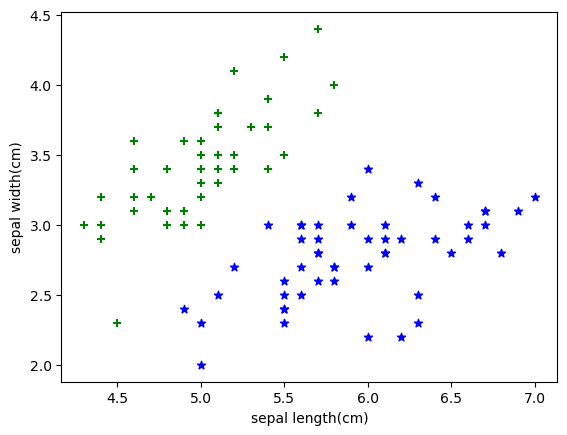

In [608]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker = '*')

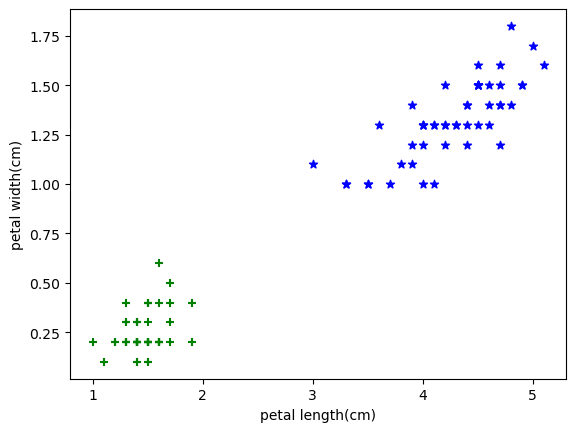

In [609]:
plt.xlabel('petal length(cm)')
plt.ylabel('petal width(cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker = '*')

In [610]:
from sklearn.model_selection import train_test_split
X = df.drop(['Target', 'flower_name'], axis = 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [612]:
y = df['Target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [613]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [614]:
X_train.shape

(120, 4)

In [615]:
X_test.shape

(30, 4)

In [616]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [617]:
knn.score(X_test, y_test)

0.9333333333333333

In [618]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 11]])

Text(50.722222222222214, 0.5, 'Actual')

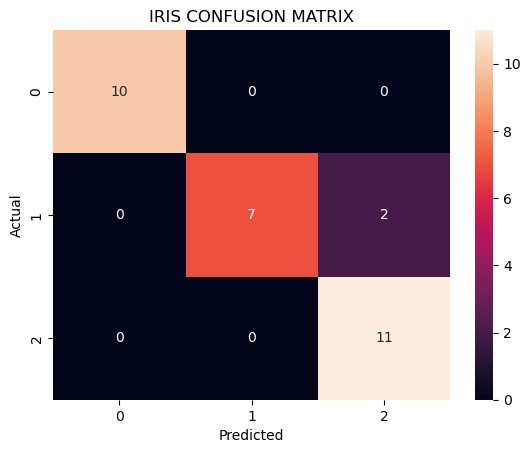

In [619]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot = True)
plt.title('IRIS CONFUSION MATRIX')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [621]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



Always scale features before applying PCA

CURSE OF DIMENSIONALITY

PCA helps us to decompose the dimensions

In [622]:
import pandas as pd
from sklearn.datasets import load_digits

In [624]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [626]:
dataset.data.shape

(1797, 64)

In [627]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [628]:
import numpy as np
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

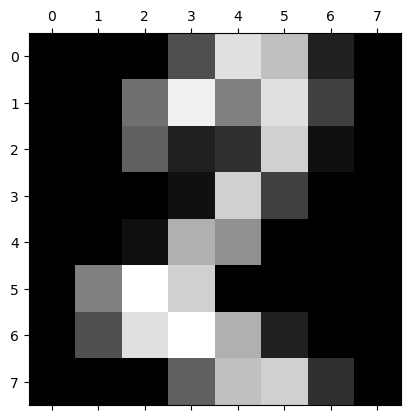

In [640]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.gray()
plt.matshow(dataset.data[50].reshape(8,8))

In [639]:
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [641]:
dataset.target[50]

2

In [642]:
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [644]:
data.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [645]:
X = data
y = dataset.target

In [646]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [647]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [650]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 30)

In [651]:
X_train.shape

(1437, 64)

In [652]:
X_test.shape

(360, 64)

In [653]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [655]:
from sklearn.decomposition import PCA
pca = PCA(0.95)     #Retains 95% of the information.
x_pca = pca.fit_transform(X)
x_pca.shape

(1797, 29)

In [656]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [657]:
pca.n_components_

29

In [658]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size = 0.15, random_state = 30)

In [660]:
from sklearn.linear_model import LogisticRegression
model_pca = LogisticRegression(max_iter = 1000)
model_pca.fit(x_train_pca, y_train_pca)
model_pca.score(x_test_pca, y_test_pca)

0.9666666666666667

In [664]:
pca_comp = PCA(n_components=2) #Decomposing all the features into 2 principal components
X_pca = pca_comp.fit_transform(X)
X_pca.shape

(1797, 2)

In [665]:
pca_comp.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [667]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size = 0.25, random_state = 10)

from sklearn.linear_model import LogisticRegression
model_pca = LogisticRegression(max_iter = 1000)
model_pca.fit(x_train_pca, y_train_pca)
model_pca.score(x_test_pca, y_test_pca)

0.6222222222222222

Bagging can involve multiple ML model however Bagged Tree will only have multiple decison trees inside it. Random Forest is a Bagged Tree.

Bootstrap Aggregation: Sampling with replacement

In [1]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
X = df.drop("Outcome",axis="columns")
y = df.Outcome

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

In [9]:
X_train.shape

(576, 8)

In [10]:
X_test.shape

(192, 8)

In [11]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [12]:
y_test.value_counts()

0    125
1     67
Name: Outcome, dtype: int64

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.69480519, 0.66233766, 0.69480519, 0.77777778, 0.7254902 ])

In [14]:
scores.mean()

0.7110432051608522

In [15]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.7517361111111112

In [16]:
bag_model.score(X_test, y_test)

0.7760416666666666

In [17]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X, y, cv=5)
scores

array([0.75324675, 0.72727273, 0.74675325, 0.82352941, 0.73856209])

In [18]:
scores.mean()

0.7578728461081402

In [19]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)
scores.mean()

0.7526271114506409